**Exponential Decline**

Given that a well has declined from 100 stb/day to 96 stb/day during a 1-month period, use the exponential decline model to perform the following tasks:

Predict the production rate after 11 more months
Calculate the amount of oil produced during the first
year 3. Project the yearly production for the well for the next 5 years

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
t_1m = 1 #month
q_1m = 96 #stb/d

t_0m = 0 #month
q_0m = 100 #stb/d

b = np.log(q_0m/q_1m)/(t_1m - t_0m)


print(f'The Decline Rate b is {b} /month')

The Decline Rate b is 0.0408219945202552 /month


In [3]:
# Now using this per month decline, we can calculate the Flow Rate at the end of 1 yr. 

def q_calculator_exp(month):
    
    return q_0m*np.exp(-month*b)


q_12m = q_calculator_exp(12)


print(f'The flowrate at the end of 12 months is: {q_12m} STB/Day')

The flowrate at the end of 12 months is: 61.27097573297669 STB/Day


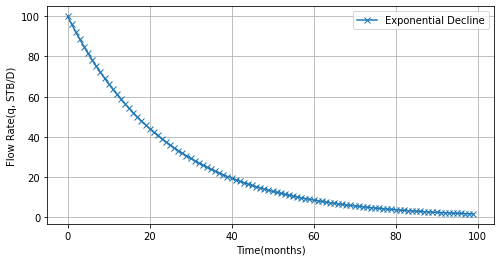

In [4]:

t = np.arange(0,100,1)

q = q_calculator_exp(t)

plt.figure(figsize=(8,4))
plt.style.use('default')

plt.plot(t,q,marker='x',label='Exponential Decline')

plt.ylabel('Flow Rate(q, STB/D)')
plt.xlabel('Time(months)')
plt.legend()
plt.grid()

In [5]:
#At the end of 5 yrs, Total Months = 5*12

q_5yr = q_calculator_exp(60)

print(f'The flowrate at the end of 5yrs is: {q_5yr} STB/Day')

The flowrate at the end of 5yrs is: 8.635231448510442 STB/Day


**Calculation of Cummulative Production**

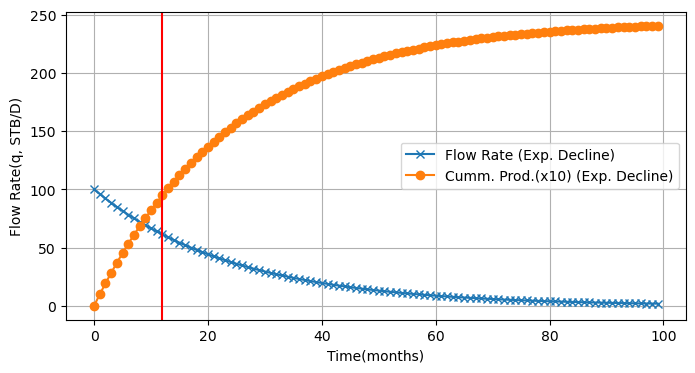

In [6]:
def Np_exp(t):
    
    Np = (q_0m - q_0m*np.exp(-b*t))/b
    
    return Np


Np_monthwise = Np_exp(t)
plt.figure(figsize=(8,4))
plt.style.use('default')

plt.plot(t,q,marker='x',label='Flow Rate (Exp. Decline)')
plt.plot(t,Np_monthwise/10,marker='o',label='Cumm. Prod.(x10) (Exp. Decline)')

Np_1yr= Np_exp(12)
Np_2yr= Np_exp(24)
Np_3yr= Np_exp(36)
Np_4yr= Np_exp(48)
Np_5yr= Np_exp(60)


plt.axvline(12,c='red')

plt.ylabel('Flow Rate(q, STB/D)')
plt.xlabel('Time(months)')
plt.legend()
plt.grid()

Text(0.5, 1.0, 'Exponential Decline Analysis')

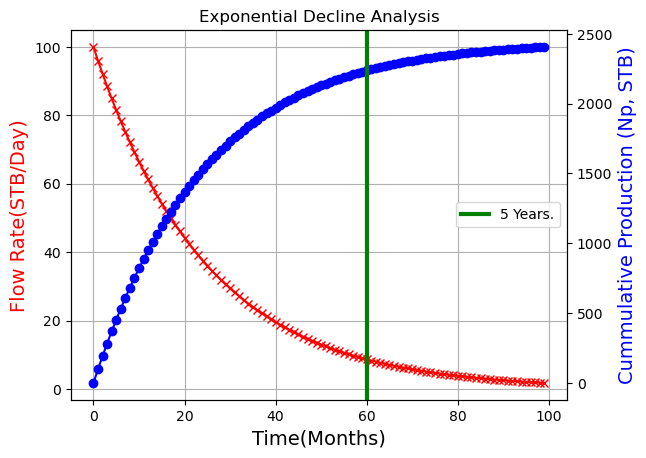

In [7]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(t,q, color="red", marker="x")
# set x-axis label
ax.set_xlabel("Time(Months)",fontsize=14)
# set y-axis label
ax.set_ylabel("Flow Rate(STB/Day)",color="red",fontsize=14)
ax.grid()



ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(t,Np_monthwise,color="blue",marker="o")
ax2.set_ylabel("Cummulative Production (Np, STB)",color="blue",fontsize=14)

ax2.axvline(60,color='green',lw=3,label='5 Years.')
ax2.legend(loc='center right')


plt.title('Exponential Decline Analysis')